### **1. Data Loading and Initial Setup**
- In this section, we load the dataset and necessary libraries for analysis.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [12]:
# Load the dataset
file_path = '/content/ab_data.csv'
df = pd.read_csv(file_path)

In [13]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


- **Goal**: Load the dataset into a Pandas DataFrame and import necessary libraries for data processing, visualization, and statistical testing.
- **Tools**: pandas, numpy, matplotlib.pyplot, and scipy.stats are used for handling the data, visualizing trends, and performing hypothesis tests.


### **2. Data Cleaning and Preprocessing**
- Here, we check for duplicates and inconsistencies mismatches between `group` and `landing_page`. We remove mismatched entries to ensure valid A/B testing.

In [14]:
# Data Cleaning & Preprocessing

# Check for duplicates
duplicate_rows = df.duplicated().sum()

# Check for mismatched entries between 'group' and 'landing_page'
mismatch_group_page = df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')")

# Remove the mismatched entries
clean_df = df.query("not ((group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page'))")

# Verify that the mismatches have been removed
mismatch_group_page_after_cleaning = clean_df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')")

- **Goal**: Clean the dataset by removing duplicate entries and any rows where the control group saw the new landing page, or the treatment group saw the old landing page.
- **Reason**: Mismatches in landing pages could skew the A/B test results, leading to inaccurate conclusions.


### **3. Exploratory Data Analysis (EDA)**
- We now calculate and visualize the conversion rates for both control and treatment groups to get an overview of the data distribution.

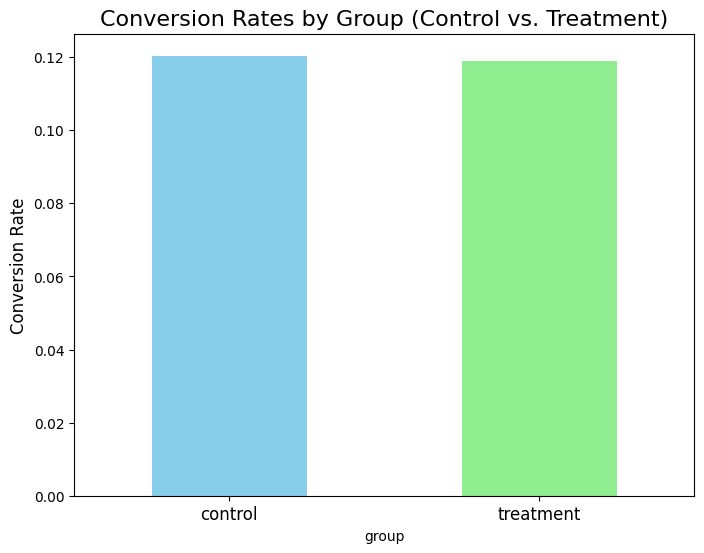

In [15]:
# Exploratory Data Analysis (EDA)

# Calculate conversion rates for control and treatment groups
conversion_rates = clean_df.groupby('group')['converted'].agg(['mean', 'count'])

# Plot the conversion rates for each group
plt.figure(figsize=(8,6))
conversion_rates['mean'].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Conversion Rates by Group (Control vs. Treatment)', fontsize=16)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.show()

- **Goal**: Understand the distribution of the conversion rates between the control and treatment groups.
- **Visualization**: A bar plot is generated to compare conversion rates between groups. This gives us a quick visual representation of how users in each group performed in terms of conversion.


### **4. A/B Test Analysis - Z-test**
- Next, we perform a statistical test (Z-test) to determine if the difference in conversion rates between the control and treatment groups is statistically significant.

In [8]:
# A/B Test Analysis - Hypothesis Testing

# Number of conversions in each group
control_conversions = clean_df[clean_df['group'] == 'control']['converted'].sum()
treatment_conversions = clean_df[clean_df['group'] == 'treatment']['converted'].sum()

# Number of users in each group
n_control = clean_df[clean_df['group'] == 'control'].shape[0]
n_treatment = clean_df[clean_df['group'] == 'treatment'].shape[0]

# Conversion rates
p_control = control_conversions / n_control
p_treatment = treatment_conversions / n_treatment

# Pooled conversion rate
p_pooled = (control_conversions + treatment_conversions) / (n_control + n_treatment)

# Standard error
se_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_control + 1/n_treatment))

# Z-score
z_score = (p_treatment - p_control) / se_pooled

# P-value (two-tailed test)
p_value = stats.norm.sf(abs(z_score)) * 2

In [17]:

print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the result is statistically significant
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The result is statistically significant, we reject the null hypothesis.")
else:
    print("The result is not statistically significant, we fail to reject the null hypothesis.")

Z-score: -1.3116
P-value: 0.1916
The result is not statistically significant, we fail to reject the null hypothesis.


- **Goal**: Perform a hypothesis test to check if the difference in conversion rates between the control and treatment groups is statistically significant.
- **Explanation**:
  - We calculate the pooled conversion rate, the standard error, and the z-score to determine the p-value.
  - A p-value will tell us whether the difference between the two groups is significant.


### **4. A/B Test Analysis - Chi-Square Test**
- Next, we perform a Chi-Square test to determine if the difference in conversion rates between the control and treatment groups is statistically significant.



In [18]:
# A/B Test Analysis - Chi-Square Test

# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(clean_df['group'], clean_df['converted'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results of the chi-square test
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Check if the result is statistically significant
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The result is statistically significant, we reject the null hypothesis.")
else:
    print("The result is not statistically significant, we fail to reject the null hypothesis.")

Chi-square statistic: 1.7053502645115002
P-value: 0.19158976298516003
The result is not statistically significant, we fail to reject the null hypothesis.


**Goal**:
- Perform a hypothesis test to check if the difference in conversion rates between the control and treatment groups is statistically significant.

**Explanation**:

- We create a contingency table from the group and converted variables, representing the number of conversions in each group.
- The chi-square test is used to determine whether there is a significant association between the group and the conversion rate.
- The p-value tells us whether the difference between the two groups is significant.

### **5. Conclusion**
- Based on the results from both the Z-test and Chi-Square test, the analysis shows no statistically significant difference in conversion rates between the control group (old landing page) and the treatment group (new landing page). The p-values from both tests (0.19) are greater than the significance level of 0.05, indicating that we fail to reject the null hypothesis. This suggests that the new landing page does not lead to a meaningful improvement in conversion rates compared to the old page. As a result, there is no evidence to support that the new landing page performs better, and further testing or adjustments may be necessary to achieve a significant impact.